In [1]:
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Image
from IPython.display import clear_output
import os

Dropdown(description='Scenario:', options=('Optimistic', 'Pessimistic', 'Best Case'), value='Optimistic')

Dropdown(description='Pyrolysis Input:', options=('DieselHeavy', 'NaphthaHeavy'), style=DescriptionStyle(descr…

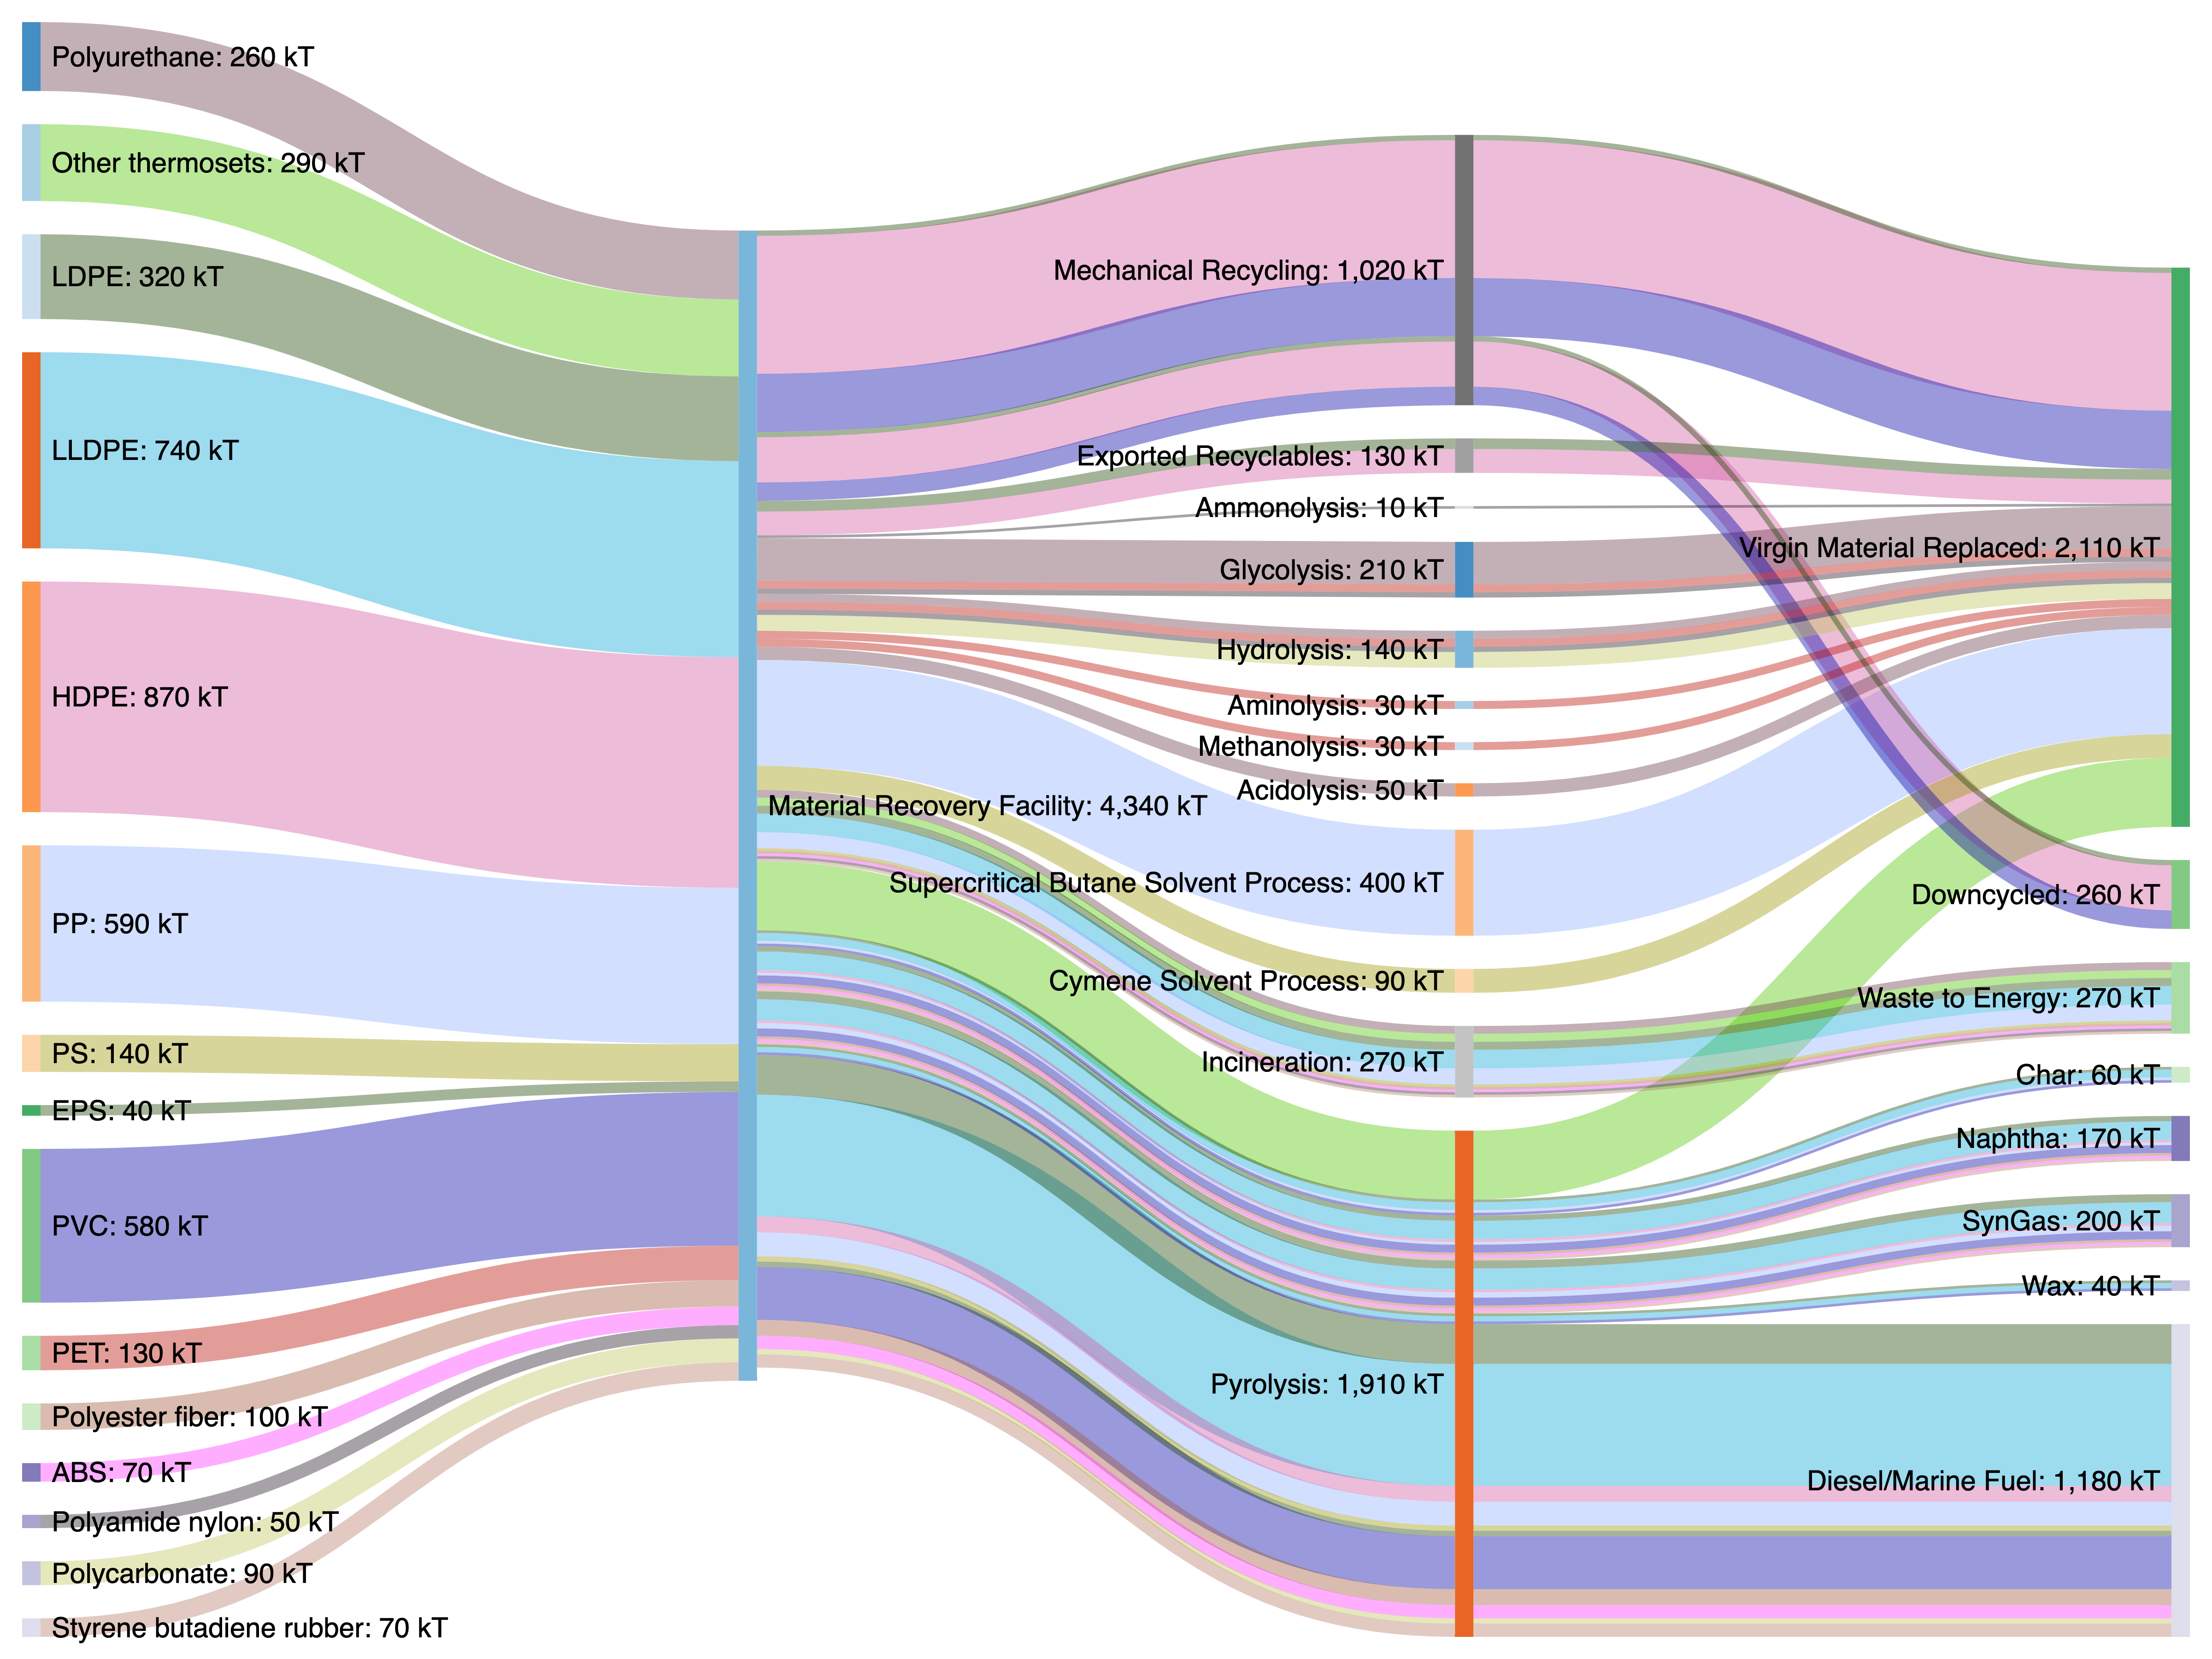

In [2]:
# Initialize scenario select input widget
scenario_select = widgets.Dropdown(
    options=['Optimistic', 'Pessimistic', 'Best Case'],
    value='Optimistic',
    description='Scenario:',
)

# Initialize pyrolysis select input widget
pyrolysis_select = widgets.Dropdown(
    options=['DieselHeavy', 'NaphthaHeavy'],
    value='DieselHeavy',
    description='Pyrolysis Input:',
    style={'description_width': 'initial'}
)

# Initially display dropdowns and corresponding figure for default values
display(scenario_select)
display(pyrolysis_select)
fname = f"SankeyMatic_ZeroWaste_Plastics_{scenario_select.value.replace(' ', '')}_{pyrolysis_select.value}.png"
i = Image(filename=fname)
display(i)

# Listener for changes in either the scenario or pyrolysis input select inputs
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        # Clear the cell output (essentially 'refreshes' displayed Sankey to reflect new selected dropdown values)
        clear_output(wait=True)
        fname = f"SankeyMatic_ZeroWaste_Plastics_{scenario_select.value.replace(' ', '')}_{pyrolysis_select.value}.png"
        i = Image(filename=fname)
        
        # Update display of dropdowns and corresponding figure for default values
        display(scenario_select)
        display(pyrolysis_select)
        display(i)

# Register on_change listener with scenario_select and pyrolysis_select inputs
scenario_select.observe(on_change)
pyrolysis_select.observe(on_change)